In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

file_path = '/content/drive/My Drive/Minor 5th Sem/final_embedded_dataset_OLD.csv'
df = pd.read_csv(file_path)
print(df.head())
df.shape

   annotator_id                                      embedded_text  \
0          3379  [-0.2818194627761841, 0.3122991919517517, -0.0...   
1           488  [-0.4389492869377136, -0.4469502866268158, -0....   
2          3275  [0.07826860249042511, 0.41834571957588196, 0.2...   
3          6801  [0.21192581951618195, 0.4548655152320862, -0.0...   
4         10615  [-0.16936637461185455, 0.056792572140693665, 0...   

   emotionaldistress  provokingviolence  individualharrassment  
0                  2                  2                      3  
1                  2                  2                      3  
2                  2                  1                      2  
3                  2                  0                      2  
4                  2                  2                      3  


(54932, 5)

Training and evaluating model for target: provokingviolence


Training provokingviolence:   0%|          | 0/100 [00:00<?, ?epoch/s]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training provokingviolence:   1%|          | 1/100 [00:08<13:29,  8.18s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training provokingviolence:   2%|▏         | 2/100 [00:16<13:42,  8.40s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training provokingviolence:   3%|▎         | 3/100 [00:23<12:42,  7.86s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158:

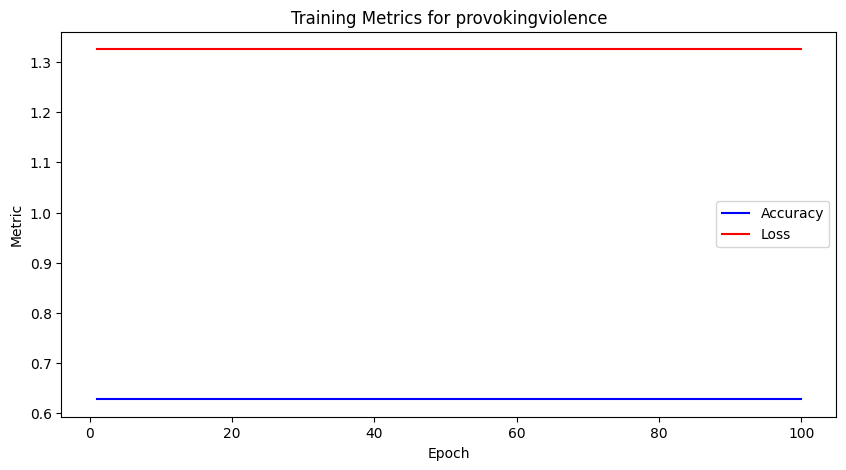

Training and evaluating model for target: individualharrassment


Training individualharrassment:   0%|          | 0/100 [00:00<?, ?epoch/s]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training individualharrassment:   1%|          | 1/100 [00:08<14:02,  8.51s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training individualharrassment:   2%|▏         | 2/100 [00:15<11:58,  7.33s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training individualharrassment:   3%|▎         | 3/100 [00:23<12:44,  7.88s/epoch]/usr/local/lib/python3.10/dist-packages/xgbo

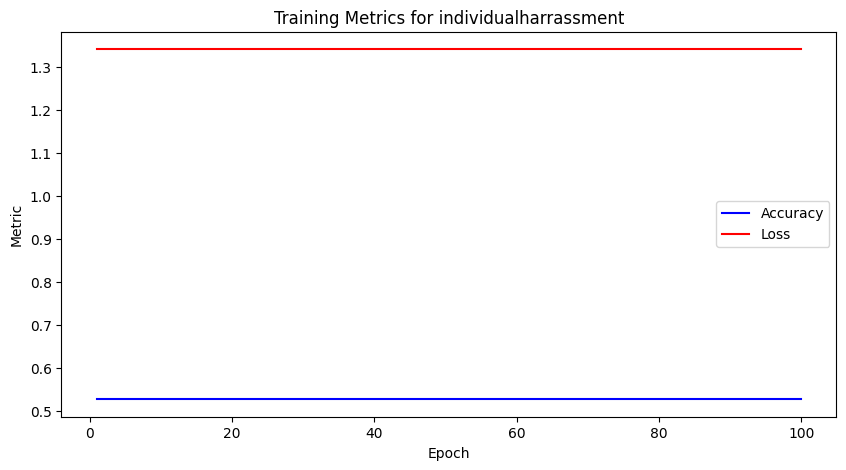

Training and evaluating model for target: emotionaldistress


Training emotionaldistress:   0%|          | 0/100 [00:00<?, ?epoch/s]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:22:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training emotionaldistress:   1%|          | 1/100 [00:08<13:15,  8.04s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training emotionaldistress:   2%|▏         | 2/100 [00:14<11:22,  6.97s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training emotionaldistress:   3%|▎         | 3/100 [00:22<12:11,  7.54s/epoch]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158:

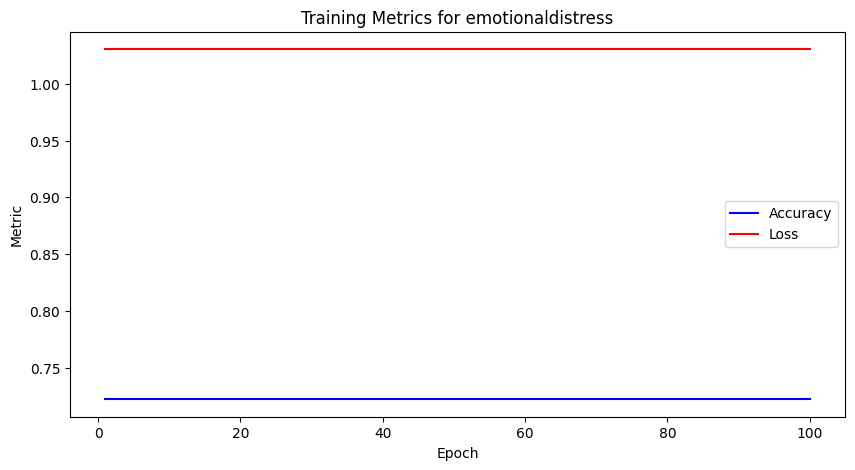

Training and evaluation complete. Predictions and metrics saved.


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for live tracking

# Load the dataset
data = df

# Convert the 'embedded_text' column to numpy arrays
data['embedded_text'] = data['embedded_text'].apply(lambda x: np.fromstring(x[1:-1], sep=','))  # Assumes embeddings as strings
X = np.array(data['embedded_text'].tolist())

# Define the target columns and initialize label encoders for each
target_columns = ['provokingviolence', 'individualharrassment', 'emotionaldistress']
label_encoders = {col: LabelEncoder() for col in target_columns}

# Encode the labels for each target column
y_encoded = {}
for col in target_columns:
    y_encoded[col] = label_encoders[col].fit_transform(data[col])

# Split data into training and validation sets for each target column
train_test_splits = {}
for col in target_columns:
    X_train, X_val, y_train, y_val = train_test_split(X, y_encoded[col], test_size=0.2, random_state=42)
    train_test_splits[col] = (X_train, X_val, y_train, y_val)

# Function to train and evaluate XGBoost for each target
def train_evaluate_xgboost(target_column):
    X_train, X_val, y_train, y_val = train_test_splits[target_column]

    # Initialize XGBoost classifier with suitable parameters
    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(label_encoders[target_column].classes_),  # Number of classes for the target
        eval_metric='mlogloss',
        use_label_encoder=False,
        max_depth=6,
        learning_rate=0.1,
        n_estimators=1,  # Will train iteratively for custom epochs
        random_state=42
    )

    metrics_table = []
    epoch_range = range(1, 101)
    train_losses = []
    train_accuracies = []

    # Custom training loop with live tracking
    for epoch in tqdm(epoch_range, desc=f"Training {target_column}", unit="epoch"):
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False, xgb_model=None)
        y_pred = model.predict(X_val)

        # Calculate metrics
        loss = model.evals_result()['validation_0']['mlogloss'][-1]
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        weighted_f1 = f1_score(y_val, y_pred, average='weighted')
        micro_f1 = f1_score(y_val, y_pred, average='micro')
        macro_f1 = f1_score(y_val, y_pred, average='macro')

        # Save metrics for this epoch
        metrics_table.append([epoch, loss, accuracy, precision, recall, weighted_f1, micro_f1, macro_f1])
        train_losses.append(loss)
        train_accuracies.append(accuracy)

    # Convert metrics table to a DataFrame for analysis
    metrics_df = pd.DataFrame(
        metrics_table,
        columns=["Epoch", "Loss", "Accuracy", "Precision", "Recall", "Weighted F1", "Micro F1", "Macro F1"]
    )
    metrics_df.to_csv(f"{target_column}_metrics.csv", index=False)

    # Plot metrics
    plt.figure(figsize=(10, 5))
    plt.plot(epoch_range, train_accuracies, label='Accuracy', color='blue')
    plt.plot(epoch_range, train_losses, label='Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.title(f"Training Metrics for {target_column}")
    plt.legend()
    plt.savefig(f"{target_column}_training_metrics.png")
    plt.show()

    # Predict on the entire dataset and save to CSV
    predictions = model.predict(X)
    predictions_labels = label_encoders[target_column].inverse_transform(predictions)
    data[f"{target_column}_predictions"] = predictions_labels

    return model, metrics_df

# Train and evaluate XGBoost model for each target column
models = {}
metrics_dfs = {}
for col in target_columns:
    print(f"Training and evaluating model for target: {col}")
    models[col], metrics_dfs[col] = train_evaluate_xgboost(col)

# Save predictions for all target columns to a single CSV
predictions_df = data[[col + "_predictions" for col in target_columns]]
predictions_df.to_csv("all_predictions.csv", index=False)

print("Training and evaluation complete. Predictions and metrics saved.")
